In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/My\ Drive/archive.zip
!unzip drive/My\ Drive/1.zip
!unzip drive/My\ Drive/2.zip
!unzip drive/My\ Drive/3.zip
!unzip drive/My\ Drive/4.zip
!unzip drive/My\ Drive/5.zip
!unzip drive/My\ Drive/6.zip

Streaming output truncated to the last 5000 lines.
  inflating: WFDB/E07846.mat         
  inflating: WFDB/E07847.hea         
  inflating: WFDB/E07847.mat         
  inflating: WFDB/E07848.hea         
  inflating: WFDB/E07848.mat         
  inflating: WFDB/E07849.hea         
  inflating: WFDB/E07849.mat         
  inflating: WFDB/E07850.hea         
  inflating: WFDB/E07850.mat         
  inflating: WFDB/E07851.hea         
  inflating: WFDB/E07851.mat         
  inflating: WFDB/E07852.hea         
  inflating: WFDB/E07852.mat         
  inflating: WFDB/E07853.hea         
  inflating: WFDB/E07853.mat         
  inflating: WFDB/E07854.hea         
  inflating: WFDB/E07854.mat         
  inflating: WFDB/E07855.hea         
  inflating: WFDB/E07855.mat         
  inflating: WFDB/E07856.hea         
  inflating: WFDB/E07856.mat         
  inflating: WFDB/E07857.hea         
  inflating: WFDB/E07857.mat         
  inflating: WFDB/E07858.hea         
  inflating: WFDB/E07858.mat         

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!pip install ecg_plot
!pip install tensorflow-addons
!pip install wfdb
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 30.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 161 kB 24.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Visualization of a single training file

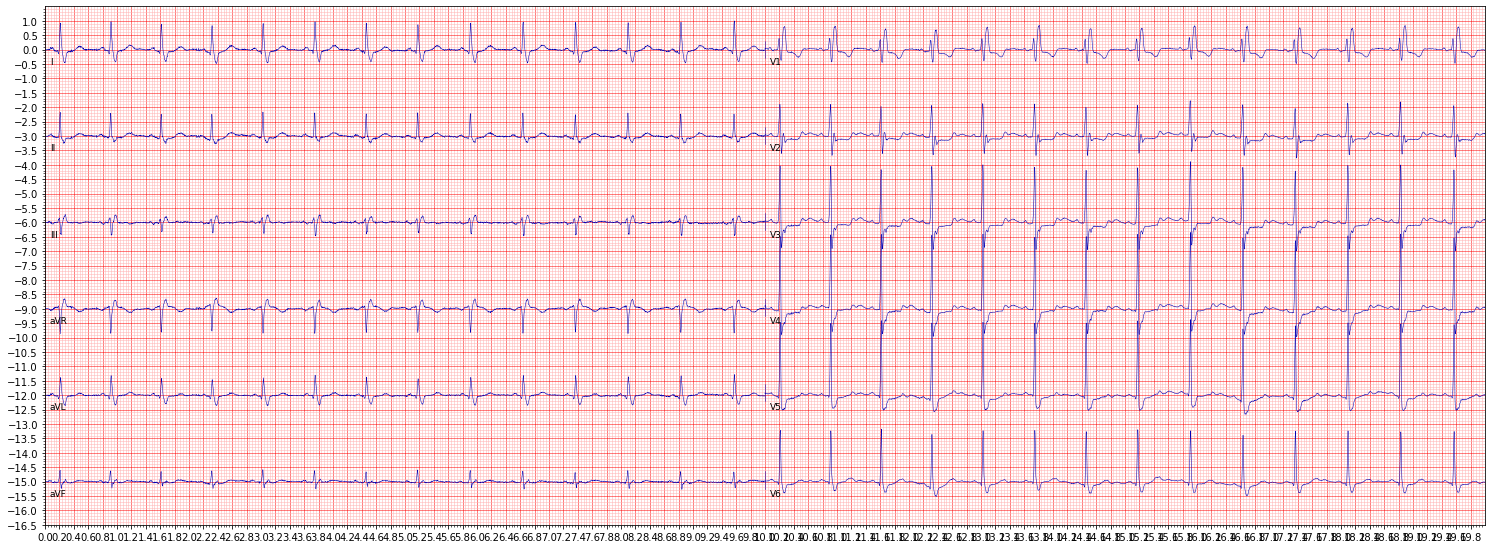

In [ ]:
from utils import helper_kaggle as hk
import ecg_plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras_preprocessing.sequence import pad_sequences
%load_ext autoreload
%autoreload
%reload_ext autoreload

def plot_ecg(path):
    ecg_data = hk.load_challenge_data(path)
    ecg_plot.plot(ecg_data[0]/1000, sample_rate=500, title='')
    ecg_plot.show()
plot_ecg("data/Training_2/Q0948.mat")

### Some preprocessing and more visualizations
1. Mapping classes and visualizing the class distributions
2. Encoding labels
3. Getting unique combinations
4. Data Split
5. Batch generator helper functions

In [ ]:
gender, age, labels, ecg_filenames = hk.import_key_data("data/")
ecg_filenames = np.asarray(ecg_filenames)

In [ ]:
len(ecg_filenames)

ecg_fns = ecg_filenames.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


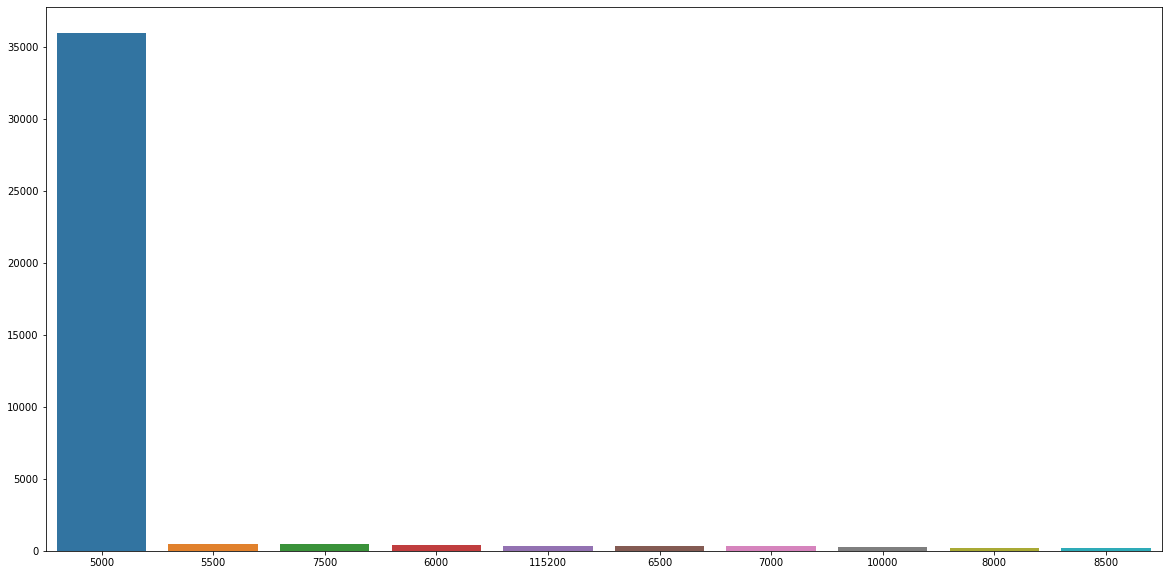

In [ ]:
import os
signal_lenght=[]
for subdir, dirs, files in sorted(os.walk("data/")):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith(".mat"):
            data, header_data = hk.load_challenge_data(filepath)
            splitted = header_data[0].split()
            signal_lenght.append(splitted[3])
signal_lenght_df = pd.DataFrame(signal_lenght)
signal_count=signal_lenght_df[0].value_counts()
plt.figure(figsize=(20,10))
#plt.title(title,fontsize =36)
sns.barplot(signal_count[:10,].index, signal_count[:10,].values)

In [ ]:
age, gender = hk.import_gender_and_age(age, gender)

gender data shape: 43101
age data shape: 43101


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

In [ ]:
SNOMED_scored=pd.read_csv("data/SNOMED_mappings_scored.csv", sep=";")
SNOMED_unscored=pd.read_csv("data/SNOMED_mappings_unscored.csv", sep=";")
df_labels = hk.make_undefined_class(labels,SNOMED_unscored)

In [ ]:
y , snomed_classes = hk.onehot_encode(df_labels)

The classes we will look at are encoded as SNOMED CT codes:
['10370003' '111975006' '164889003' '164890007' '164909002' '164917005'
 '164934002' '164947007' '17338001' '251146004' '270492004' '284470004'
 '39732003' '426177001' '426627000' '426783006' '427084000' '427172004'
 '427393009' '445118002' '47665007' '59118001' '59931005' '63593006'
 '698252002' '713426002' '713427006' 'undefined class']
classes: 27


In [ ]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
snomed_abbr = []
for j in range(len(snomed_classes)):
    for i in range(len(SNOMED_scored.iloc[:,1])):
        if (str(SNOMED_scored.iloc[:,1][i]) == snomed_classes[j]):
            snomed_abbr.append(SNOMED_scored.iloc[:,2][i])
            
snomed_abbr = np.asarray(snomed_abbr)

In [ ]:
y_all_comb = hk.get_labels_for_all_combinations(y)
print("Total number of unique combinations of diagnosis: {}".format(len(np.unique(y_all_comb))))

Total number of unique combinations of diagnosis: 1414


In [ ]:
folds = hk.split_data(labels, y_all_comb)

Training split: 38790
Validation split: 4311


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


In [ ]:
# plot_all_folds(folds,y,snomed_classes)

In [ ]:
order_array = folds[0][0]

In [ ]:
def shuffle_batch_generator_demo(batch_size, gen_x,gen_y, gen_z): 
    np.random.shuffle(order_array)
    batch_features = np.zeros((batch_size,5000, 12))
    batch_labels = np.zeros((batch_size,snomed_classes.shape[0])) #drop undef class
    batch_demo_data = np.zeros((batch_size,2))
    while True:
        for i in range(batch_size):

            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
            batch_demo_data[i] = next(gen_z)

        X_combined = [batch_features, batch_demo_data]
        yield X_combined, batch_labels
        
def shuffle_batch_generator(batch_size, gen_x,gen_y): 
    np.random.shuffle(order_array)
    batch_features = np.zeros((batch_size,5000, 12))
    batch_labels = np.zeros((batch_size,snomed_classes.shape[0])) #drop undef class
    while True:
        for i in range(batch_size):

            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
            
        yield batch_features, batch_labels

def generate_y_shuffle(y_train):
    while True:
        for i in order_array:
            y_shuffled = y_train[i]
            yield y_shuffled


def generate_X_shuffle(X_train):
    while True:
        for i in order_array:
                #if filepath.endswith(".mat"):
                    data, header_data = hk.load_challenge_data(X_train[i])
                    X_train_new = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
                    X_train_new = X_train_new.reshape(5000,12)
                    yield X_train_new

def generate_z_shuffle(age_train, gender_train):
    while True:
        for i in order_array:
            gen_age = age_train[i]
            gen_gender = gender_train[i]
            z_train = [gen_age , gen_gender]
            yield z_train

### Calculating class weight for each label

In [ ]:
new_weights = hk.calculating_class_weights(y)

In [ ]:
keys = np.arange(0,27,1)
weight_dictionary = dict(zip(keys, new_weights.T[1]))
weight_dictionary

{0: 72.0752508361204,
 1: 14.243555849306015,
 2: 6.201582733812949,
 3: 68.63216560509554,
 4: 20.701729106628243,
 5: 21.273938795656466,
 6: 4.611705542478066,
 7: 63.383823529411764,
 8: 59.04246575342466,
 9: 38.759892086330936,
 10: 9.00187969924812,
 11: 12.464141122035858,
 12: 3.5409957279000985,
 13: 9.13543874523103,
 14: 74.828125,
 15: 1.0337954523649622,
 16: 8.971898417985013,
 17: 114.63031914893617,
 18: 17.379435483870967,
 19: 11.932724252491694,
 20: 50.469555035128806,
 21: 8.971898417985013,
 22: 19.379946043165468,
 23: 100.23488372093023,
 24: 21.615346038114343,
 25: 13.37709497206704,
 26: 31.552708638360176}

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_AUC', factor=0.1, patience=1, verbose=1, mode='max',
    min_delta=0.0001, cooldown=0, min_lr=0
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_AUC', mode='max', verbose=1, patience=2)

In [ ]:
from scipy import optimize
def thr_chall_metrics(thr, label, output_prob):
    return -hk.compute_challenge_metric_for_opt(label, np.array(output_prob>thr))

### Proposed Model Residual-Inception based Network

In [ ]:
from models.proposed import inception_model

In [ ]:
inception_model = inception_model(input_shape = (5000,12))
inception_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.BinaryAccuracy(
      name='accuracy', dtype=None, threshold=0.5),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
                  tf.keras.metrics.AUC(
      num_thresholds=200,
      curve="ROC",
      summation_method="interpolation",
      name="AUC",
      dtype=None,
      thresholds=None,
      multi_label=True,
      label_weights=None,
  )])

inception_model.summary()


Model: "Inception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5000, 12)]   0           []                               
                                                                                                  
 zero_padding1d (ZeroPadding1D)  (None, 5006, 12)    0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 5006, 512)    31232       ['zero_padding1d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 5006, 512)   2048        ['conv1d[0][0]']                 
 alization)                                                                               

#### Note: Recommended training for 20-25 epochs, consult my_models and load "my_model_20_epochs". Below is just the achieved results on 10 epochs

In [ ]:
batchsize = 10
inception_model.fit(x=shuffle_batch_generator(batch_size=batchsize, gen_x=generate_X_shuffle(ecg_filenames), gen_y=generate_y_shuffle(y)), epochs=10, steps_per_epoch=(len(order_array)/(batchsize*10)), validation_data=generate_validation_data(ecg_filenames,y,folds[0][1]), callbacks=[reduce_lr])

Epoch 1/10
387/387 [==============================] - 668s 2s/step - loss: 0.1596 - accuracy: 0.9486 - Recall: 0.2120 - Precision: 0.5088 - AUC: 0.6187 - val_loss: 0.1493 - val_accuracy: 0.9547 - val_Recall: 0.2464 - val_Precision: 0.6725 - val_AUC: 0.6729 - lr: 0.0010
Epoch 2/10
387/387 [==============================] - 636s 2s/step - loss: 0.1431 - accuracy: 0.9555 - Recall: 0.2654 - Precision: 0.6766 - AUC: 0.6554 - val_loss: 0.1414 - val_accuracy: 0.9569 - val_Recall: 0.2915 - val_Precision: 0.7053 - val_AUC: 0.7265 - lr: 0.0010
Epoch 3/10
387/387 [==============================] - 636s 2s/step - loss: 0.1380 - accuracy: 0.9560 - Recall: 0.2799 - Precision: 0.6861 - AUC: 0.6934 - val_loss: 0.1450 - val_accuracy: 0.9568 - val_Recall: 0.3059 - val_Precision: 0.6883 - val_AUC: 0.7735 - lr: 0.0010
Epoch 4/10
387/387 [==============================] - 636s 2s/step - loss: 0.1318 - accuracy: 0.9574 - Recall: 0.2991 - Precision: 0.6972 - AUC: 0.7284 - val_loss: 0.1492 - val_accuracy: 0.9

### Plotting training and validation results

Text(0, 0.5, 'Accuracy')

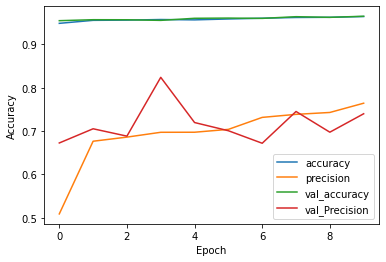

In [ ]:
plt.plot(inception_model.history.history['accuracy'])
plt.plot(inception_model.history.history['Precision'])
plt.plot(inception_model.history.history['val_accuracy'])
plt.plot(inception_model.history.history['val_Precision'])
plt.legend(("accuracy","precision","val_accuracy","val_Precision"))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

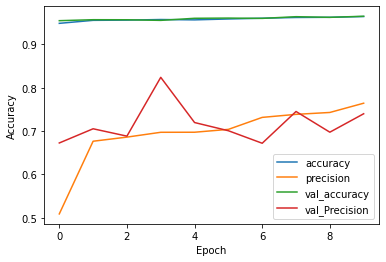

In [ ]:
plt.plot(inception_model.history.history['accuracy'])
plt.plot(inception_model.history.history['Precision'])
plt.plot(inception_model.history.history['val_accuracy'])
plt.plot(inception_model.history.history['val_Precision'])
plt.legend(("accuracy","precision","val_accuracy","val_Precision"))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

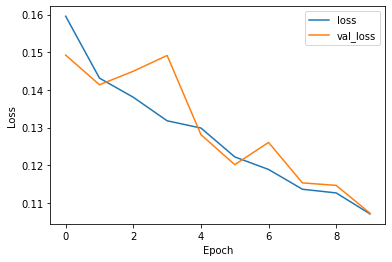

In [ ]:
plt.plot(inception_model.history.history['loss'])
plt.plot(inception_model.history.history['val_loss'])
plt.legend(("loss","val_loss"))
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0.5, 0, 'Epoch')

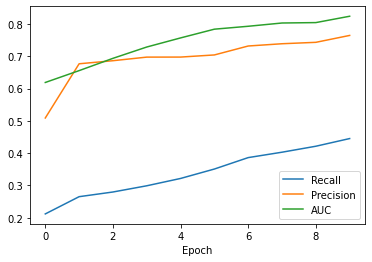

In [ ]:
plt.plot(inception_model.history.history['Recall'])
plt.plot(inception_model.history.history['Precision'])
plt.plot(inception_model.history.history['AUC'])
plt.legend(("Recall","Precision","AUC"))
plt.xlabel('Epoch')

### Checking Test results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:901: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0.1518984756489102
0.28760806771957986
0.3787552188488709
0.41649024358699505
0.4245373119949672
0.4087355019756219
0.3799247656903001
0.3301391123840649
0.2808229262740062
0.22569456467942192
0.17404616491069466
0.11809131427421486
0.058524230968945115
-0.019292503377680303
-0.09121942500588412
-0.16430334980216807
-0.25656844438993603
-0.3469533884569308
-0.46434691640919606
-0.6448004581353473
Optimization terminated successfully.
         Current function value: -0.435601
         Iterations: 291
         Function evaluations: 571


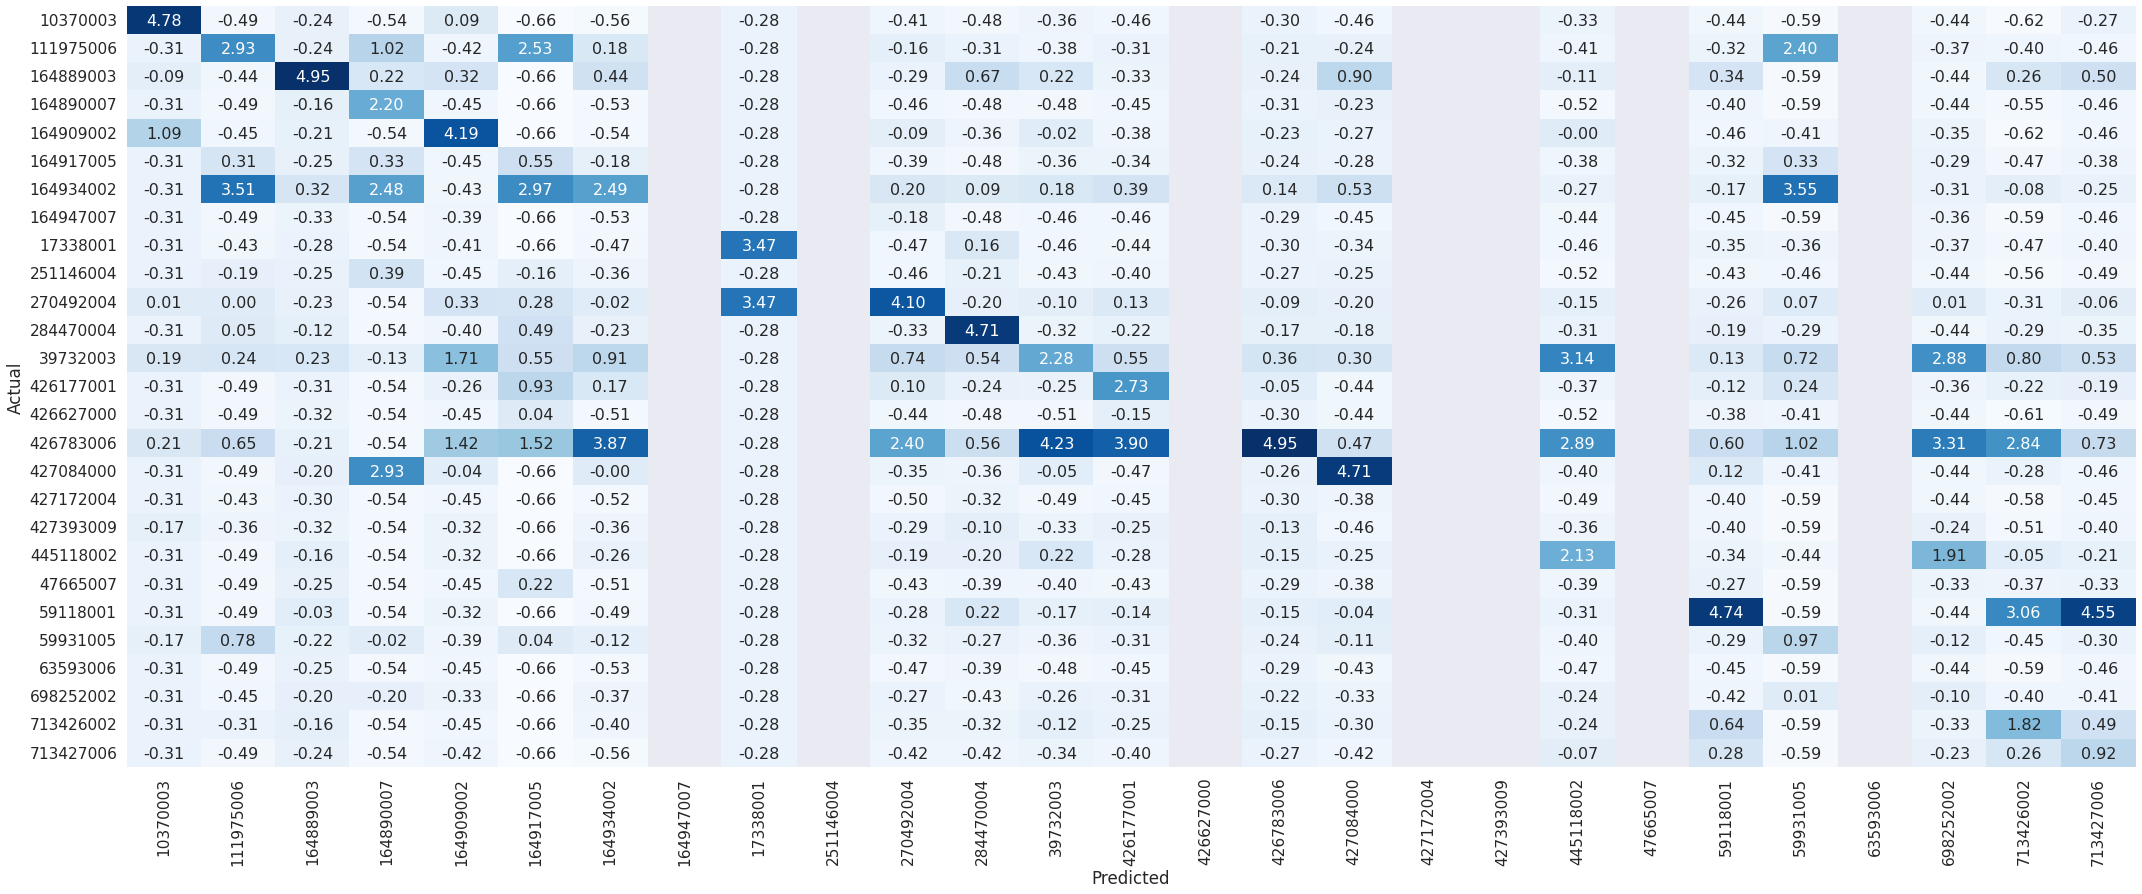

In [ ]:
y_pred = inception_model.predict(x=hk.generate_validation_data(ecg_filenames,y,folds[0][1])[0])
init_thresholds = np.arange(0,1,0.05)
all_scores = hk.iterate_threshold(y_pred, ecg_filenames, y ,folds[0][1] )
new_best_thr = optimize.fmin(thr_chall_metrics, args=(hk.generate_validation_data(ecg_filenames,y,folds[0][1])[1],y_pred), x0=init_thresholds[all_scores.argmax()]*np.ones(27))

def plot_normalized_conf_matrix_dev(y_pred, ecg_filenames, y, val_fold, threshold, snomedclasses):
    df_cm = pd.DataFrame(hk.compute_modified_confusion_matrix(hk.generate_validation_data(ecg_filenames,y,val_fold)[1], (y_pred>threshold)*1), columns=snomedclasses, index = snomedclasses)
    df_cm = df_cm.fillna(0)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
    plt.figure(figsize = (36,14))
    sns.set(font_scale=1.4)
    sns.heatmap(df_norm_col, cmap="Blues", annot=True,annot_kws={"size": 16},fmt=".2f",cbar=False)# font size

plot_normalized_conf_matrix_dev(y_pred, ecg_filenames, y, folds[0][1], new_best_thr, snomed_classes)
plt.savefig("confusion_matrix_inception.png", dpi=100)

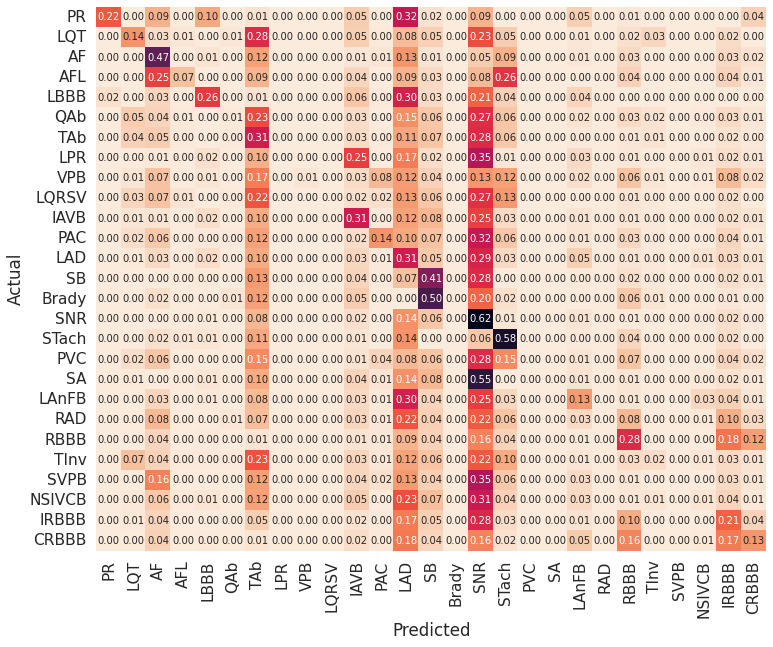

In [ ]:
hk.plot_normalized_conf_matrix(y_pred, ecg_filenames, y, folds[0][1], new_best_thr, snomed_classes, snomed_abbr)
plt.savefig("confusion_matrix_resnet.png", dpi=100)

In [ ]:
print(hk.compute_challenge_metric_for_opt(hk.generate_validation_data_with_demo_data(ecg_filenames,y, gender, age,folds[0][1])[1],(y_pred>new_best_thr)*1))

0.43560127557040335


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:901: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
